In [5]:
%matplotlib inline
from os.path import dirname, join as path_join
import sys
sys.path.insert(0, "../../../")
sys.path.insert(0, "/home/moritz/thesis_repos/MCMCVisualizer")
from itertools import islice
import numpy as np

import torch

from pysgmcmc.samplers.sgld import SGLD
from mcmc_visualizer.plots.distplot import distplot


parameter = torch.rand(1, requires_grad=True)

energy_function = torch.distributions.MultivariateNormal(
    loc=torch.tensor((-5., 0., 5.)),
    covariance_matrix=torch.eye(3)
)

def negative_log_likelihood(params):
    x, = params
    return -energy_function.log_prob(x)

def to_negative_log_likelihood(log_prob_function):
    def wrapped(*args, **kwargs):
        return -log_prob_function(*args, **kwargs)
    return wrapped

sampler = SGLD(
    params=(parameter,),
    lr=0.01,
    negative_log_likelihood=negative_log_likelihood
)

num_burn_in_steps = 3000
num_sample_steps = 100000
num_steps = num_burn_in_steps + num_sample_steps

Trace with 1 chains of 100000 steps each for 1 parameters.


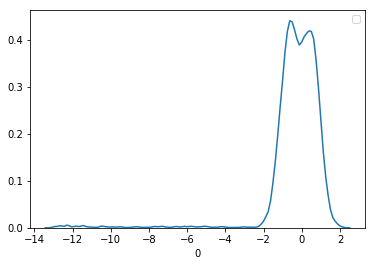

In [6]:
import matplotlib.pyplot as plt
sample_chain = islice(sampler, num_burn_in_steps, num_steps)
distplot(np.reshape([sample for sample, _ in sample_chain], (1, num_sample_steps, 1)))
plt.show()